In [43]:
from sklearn import datasets
x,y = datasets.make_classification(n_samples=100, 
                                   n_features=2, 
                                   n_redundant=0, 
                                   n_classes=2,
                                   random_state=1)

Text(0,0.5,'y values')

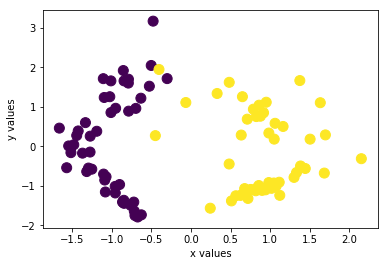

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x[:, 0], x[:, 1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')

In [45]:
import numpy as np
x = x.astype(np.float32)
y = y * 2 - 1

In [46]:
from sklearn import model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, 
                                                       test_size=0.2, 
                                                       random_state=1)

In [47]:
import cv2
from sklearn import metrics
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.train(x_train, cv2.ml.ROW_SAMPLE, y_train)
_, y_pred = svm.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

1.0